In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
df = pd.read_csv('banking_churn (2).csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [301]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [302]:
#We are checking wheter the target feature(Exited) has descreet value of continuoue values
df.Exited.value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

In [303]:
df.shape

(10000, 14)

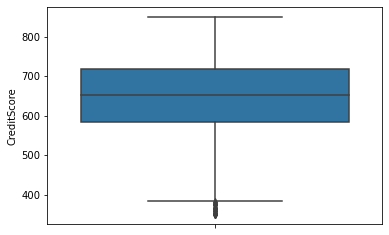

In [304]:
sns.boxplot(y=df['CreditScore'])
plt.show()

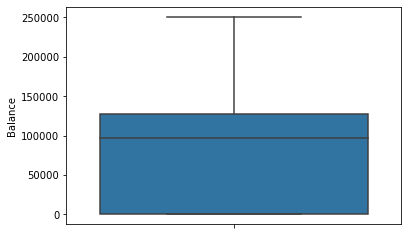

In [305]:
sns.boxplot(y=df.Balance)
plt.show()

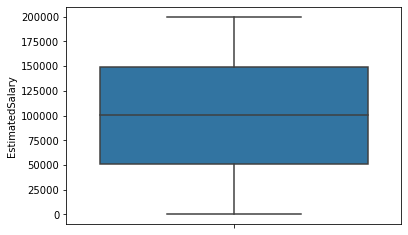

In [306]:
sns.boxplot(y=df.EstimatedSalary)
plt.show()

C:\Users\user\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


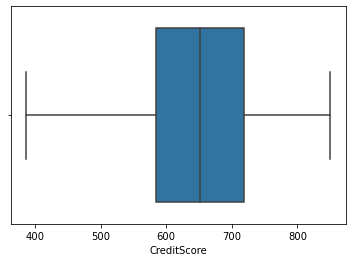

In [307]:
#Since we only have outliers in the creditscore feature, we shall remove the outliers in this feature.

def Remove_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    Iqr = q3 -q1
    factor = 1.5*Iqr
    lower = q1 - factor
    upper = q3 + factor
    return lower, upper

lower,upper = Remove_outliers(df.CreditScore)

df = df.loc[(df.CreditScore > lower) & (df.CreditScore < upper)]

sns.boxplot(df.CreditScore)
plt.show()


# Avoiding data leakage

In [308]:
x = df.drop(['Exited'],axis=1)
y = df['Exited']

In [309]:
from sklearn.model_selection import train_test_split

In [311]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [312]:
#Encode Gender feature
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#Apply to x_train and x_test

X_train.loc[:, 'Gender'] = le.fit_transform(X_train.loc[:, 'Gender'])
X_test.loc[:,'Gender'] = le.fit_transform(X_test.loc[:,'Gender'])

In [314]:
#Encoding the Geography feature

X_train.loc[:, 'Geography'] = le.fit_transform(X_train.loc[:, 'Geography'])
X_test.loc[:,'Geography'] = le.fit_transform(X_test.loc[:,'Geography'])

In [315]:
#Encoding the Surname feature

X_train.loc[:, 'Surname'] = le.fit_transform(X_train.loc[:, 'Surname'])
X_test.loc[:,'Surname'] = le.fit_transform(X_test.loc[:,'Surname'])

In [316]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6717,6718,15586674,2149,663,2,0,58,5,216109.88,1,0,1,74176.71
1180,1181,15570326,2511,621,0,1,34,6,0.00,2,1,1,99128.13
4713,4714,15764448,1451,837,1,1,35,0,144037.60,1,1,0,145325.32
6776,6777,15800583,491,621,2,0,43,8,0.00,1,0,0,102806.60
7462,7463,15598266,1498,610,0,1,40,9,0.00,1,1,1,149602.54


In [317]:
X_test.Tenure.value_counts()

2     217
7     213
1     205
5     204
8     202
9     200
6     200
4     185
3     184
10    102
0      85
Name: Tenure, dtype: int64

(array([795., 767., 827., 822., 811., 802., 794., 783., 804., 782.]),
 array([9.00700000e+01, 2.00763960e+04, 4.00627220e+04, 6.00490480e+04,
        8.00353740e+04, 1.00021700e+05, 1.20008026e+05, 1.39994352e+05,
        1.59980678e+05, 1.79967004e+05, 1.99953330e+05]),
 <BarContainer object of 10 artists>)

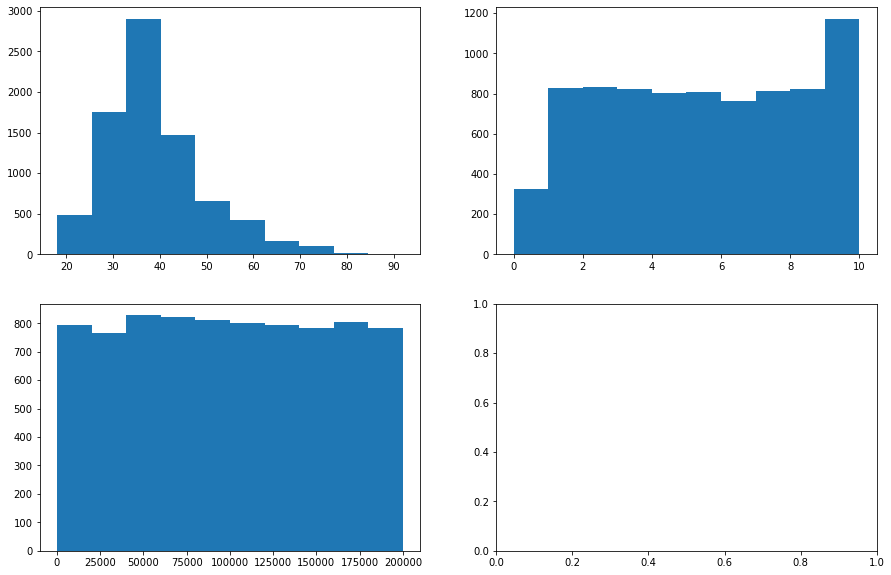

In [318]:
#Continuous variables: Age,Tenure and EstimatedSalary

fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0][0].hist(X_train.Age)
ax[0][1].hist(X_train.Tenure)
ax[1][0].hist(X_train.EstimatedSalary)

In [319]:
#Apply to x_train set

X_train['Age_binned'] = pd.qcut(X_train.Age, q=[0, .25, .50, .75, 1])
X_train['Tenure_binned'] = pd.qcut(X_train.Tenure, q=[0, .25, .50, .75, 1])
X_train['EstimatedSalary_binned'] = pd.qcut(X_train.EstimatedSalary, q=[0, .25, .50, .75, 1])

#X_train.drop(['Age','Tenure','EstimatedSalary'],axis=1,inplace=True)

#we encode the newly created features usinfg the label encoder

X_train['Age'] = le.fit_transform(X_train['Age_binned'])
X_train['Tenure'] = le.fit_transform(X_train['Tenure_binned'])
X_train['EstimatedSalary'] = le.fit_transform(X_train['EstimatedSalary_binned'])

X_train.drop(['Age_binned','Tenure_binned','EstimatedSalary_binned'],axis=1, inplace=True)
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6717,6718,15586674,2149,663,2,0,3,1,216109.88,1,0,1,1
1180,1181,15570326,2511,621,0,1,1,2,0.00,2,1,1,1
4713,4714,15764448,1451,837,1,1,1,0,144037.60,1,1,0,2
6776,6777,15800583,491,621,2,0,2,3,0.00,1,0,0,2
7462,7463,15598266,1498,610,0,1,2,3,0.00,1,1,1,3


In [321]:
#Apply to x_test set

X_test['Age_binned'] = pd.qcut(X_test.Age, q=[0, .25, .50, .75, 1])
X_test['Tenure_binned'] = pd.qcut(X_test.Tenure, q=[0, .25, .50, .75, 1])
X_test['EstimatedSalary_binned'] = pd.qcut(X_test.EstimatedSalary, q=[0, .25, .50, .75, 1])

#X_test.drop(['Age','Tenure','EstimatedSalary'],axis=1,inplace=True)
#we encode the newly created features usinfg the label encoder
X_test['Age'] = le.fit_transform(X_test['Age_binned'])
X_test['Tenure'] = le.fit_transform(X_test['Tenure_binned'])
X_test['EstimatedSalary'] = le.fit_transform(X_test['EstimatedSalary_binned'])


X_1_test = X_test.copy()



X_1_test



ValueError: Bin edges must be unique: array([0., 0., 1., 2., 3.]).
You can drop duplicate edges by setting the 'duplicates' kwarg